In [1]:
import numpy as np
import tensorflow as tf
from keras.models import Model
from keras.layers import Input, LSTM, Embedding, Dense
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences


In [2]:
f = open('/content/drive/MyDrive/hindi.txt')
corp = f.read()

In [3]:
corp

"बटाटा ( सोलॅनम ट्यूबरोसम ) हे जगातील सर्वात महत्वाचे अन्न पीक आहे. बटाटा हे भारतातील उपोष्णकटिबंधीय परिस्थितीत घेतले जाणारे समशीतोष्ण पीक आहे. बटाटा हे नेहमीच 'गरीब माणसाचे मित्र' असलेले पीक आहे. देशात गेल्या 300 हून अधिक वर्षांपासून बटाट्याची लागवड केली जात आहे. भाजीपाला उद्देशाने ते या देशातील सर्वात लोकप्रिय पिकांपैकी एक बनले आहे. बटाटे हे किफायतशीर अन्न आहे; ते मानवी आहाराला कमी किमतीत उर्जेचा स्रोत प्रदान करतात. बटाटे हे स्टार्च, जीवनसत्त्वे विशेषतः C आणि B1 आणि खनिजे यांचा समृद्ध स्रोत आहेत. त्यामध्ये 20.6 टक्के कर्बोदके, 2.1 टक्के प्रथिने, 0.3 टक्के चरबी, 1.1 टक्के क्रूड फायबर आणि 0.9 टक्के राख असते. त्यामध्ये ल्युसीन, ट्रिप्टोफेन आणि आयसोल्युसीन इत्यादी आवश्यक अमीनो ऍसिड देखील चांगल्या प्रमाणात असतात.\n\nबटाटे अनेक औद्योगिक कारणांसाठी वापरले जातात जसे की स्टार्च आणि अल्कोहोल तयार करण्यासाठी. बटाटा स्टार्च (फॅरिना) लाँड्रीमध्ये आणि कापड गिरण्यांमध्ये सूत आकार देण्यासाठी वापरला जातो. बटाटे डेक्सट्रिन आणि ग्लुकोजच्या उत्पादनासाठी देखील वापरले जातात. एक खाद्यपदार्थ म्हणून, बटाटे '

In [4]:

corpus = corp.replace('|', '.').split('.')

# Tokenize the text
tokenizer = Tokenizer(filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n')
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

# Create input sequences and corresponding output sequences
input_sequences = []
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

max_sequence_length = max([len(x) for x in input_sequences])
input_sequences = pad_sequences(input_sequences, maxlen=max_sequence_length, padding='pre')

X, y = input_sequences[:, :-1], input_sequences[:, -1]
y = tf.keras.utils.to_categorical(y, num_classes=total_words)

# Define the model
embedding_dim = 50
hidden_units = 100

input_layer = Input(shape=(max_sequence_length-1,))
embedding_layer = Embedding(total_words, embedding_dim, input_length=max_sequence_length-1)(input_layer)
lstm_layer = LSTM(hidden_units)(embedding_layer)
output_layer = Dense(total_words, activation='softmax')(lstm_layer)

model = Model(inputs=input_layer, outputs=output_layer)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X, y, epochs=200)
print(history.history.keys())
# Function to generate responses
def generate_response(prompt, model, tokenizer, max_sequence_length):
  e,acc = model.evaluate(X,y)
  print('Model Accuracy: ',acc)
  print('Model Loss: ',e)
  for _ in range(5):  # Generate multiple responses
        token_list = tokenizer.texts_to_sequences([prompt])[0]
        token_list = pad_sequences([token_list], maxlen=max_sequence_length-1, padding='pre')
        predicted_token = model.predict_step(token_list)
        output_word = ""
        p=list(predicted_token)
        for word, index in tokenizer.word_index.items():

            if index == p.index(max(p)):
                output_word = word
                break
        prompt += " " + output_word
  return prompt

# Test the chatbot
user_input = "How does"
response = generate_response(user_input, model, tokenizer, max_sequence_length)


Epoch 1/200
66/66 [==============================] - 11s 93ms/step - loss: 6.8510 - accuracy: 0.0369
Epoch 2/200
66/66 [==============================] - 6s 86ms/step - loss: 6.4997 - accuracy: 0.0470
Epoch 3/200
66/66 [==============================] - 7s 111ms/step - loss: 6.4225 - accuracy: 0.0470
Epoch 4/200
66/66 [==============================] - 4s 63ms/step - loss: 6.3567 - accuracy: 0.0470
Epoch 5/200
66/66 [==============================] - 3s 44ms/step - loss: 6.2570 - accuracy: 0.0470
Epoch 6/200
66/66 [==============================] - 4s 66ms/step - loss: 6.1551 - accuracy: 0.0470
Epoch 7/200
66/66 [==============================] - 3s 49ms/step - loss: 6.0424 - accuracy: 0.0470
Epoch 8/200
66/66 [==============================] - 3s 45ms/step - loss: 5.8865 - accuracy: 0.0508
Epoch 9/200
66/66 [==============================] - 3s 46ms/step - loss: 5.6884 - accuracy: 0.0513
Epoch 10/200
66/66 [==============================] - 4s 62ms/step - loss: 5.4969 - accuracy: 0.05

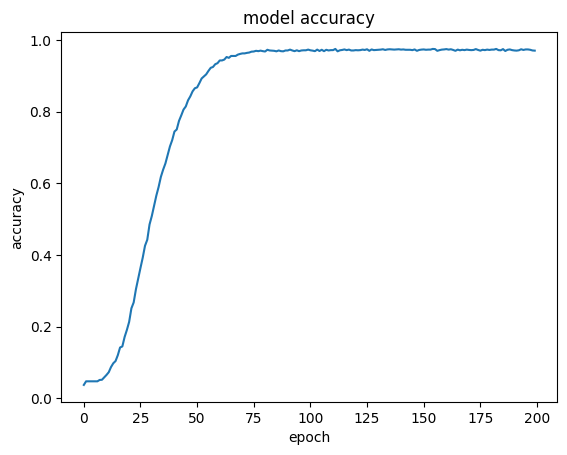

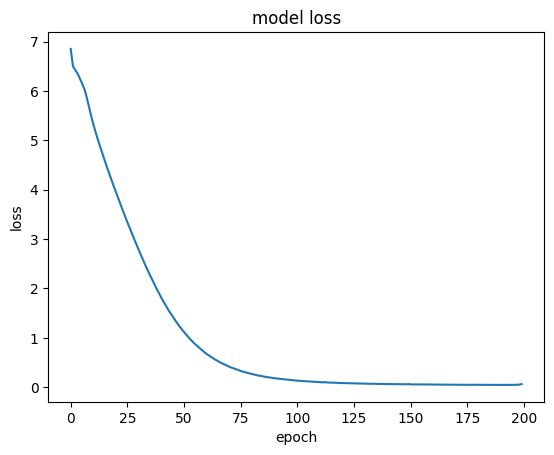

In [5]:
import matplotlib.pyplot as plt


plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.show()

plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.show()
